# 5_combine_phases
## Notebook to combine TensorMap phases 
__Written by Haixing Fang, Jon Wright and James Ball__  
__Date: 21/02/2025__

In this notebook, we simply combine all the phases we reconstruct to get a complete grain map

In [1]:
exec(open('/data/id11/nanoscope/install_ImageD11_from_git.py').read())

Change : 
1. the dataset name (*dset_path*)
2. the phases name ([*major_phase*, *minor_phase*])

In [2]:
# this cell is tagged with 'parameters'
# to view the tag, select the cell, then find the settings gear icon (right or left sidebar) and look for Cell Tags

# python environment stuff
PYTHONPATH = setup_ImageD11_from_git( os.path.join( os.environ['HOME'],'Code', 'Tutorial', 'SCRIPTS'), 'ImageD11' )# ( os.path.join( os.environ['HOME'],'Code'), 'ImageD11_git' )

# dataset file to import
dset_path = '../FeAu_0p5_tR_nscope/FeAu_0p5_tR_nscope_top_200um/FeAu_0p5_tR_nscope_top_200um_dataset.h5'

phase_strs = ['Fe', 'Au']

# whether or not we are combining refined tensormaps (changes where we look for them)
combine_refined = True

# Setting path via: 
sys.path.insert(0, /home/esrf/ljegou/Code/Tutorial/SCRIPTS/ImageD11 )
# Running from: /home/esrf/ljegou/Code/Tutorial/SCRIPTS/ImageD11/ImageD11/__init__.py


In [3]:
import os

import ImageD11.sinograms.dataset
from ImageD11.sinograms.tensor_map import TensorMap

# %matplotlib ipympl

# Load data
1. The dataset
2. The phases

## Dataset

In [4]:
ds = ImageD11.sinograms.dataset.load(dset_path)
print(ds)

dataroot = "/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/RAW_DATA"
analysisroot = "/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/PROCESSED_DATA/20250626_LJ"
sample = "FeAu_0p5_tR_nscope"
dset = "top_200um"
shape = ( 275, 1448)
# scans 275 from 1.1 to 275.1


## Phases
If the parameter file was a json, we can access the unit cells via `ds.phases.unitcells`

In [5]:
ds.phases = ds.get_phases_from_disk()
ds.phases.unitcells

{'Au': Au | [ 4.005  4.005  4.005 90.    90.    90.   ] | 225,
 'Fe': Fe | [ 2.8694  2.8694  2.8694 90.     90.     90.    ] | 229,
 'B2': B2 | [ 3.8867  3.8867  3.8867 90.     90.     90.    ] | 221,
 'CeO2': CeO2 | [ 5.41143  5.41143  5.41143 90.      90.      90.     ] | F}

Unit cells of the phases we are merging 

In [6]:
print(*[ds.phases.unitcells[phase_str].lattice_parameters for phase_str in phase_strs], sep='\n')

[ 2.8694  2.8694  2.8694 90.     90.     90.    ]
[ 4.005  4.005  4.005 90.    90.    90.   ]


Choose where to import your TensorMaps from.  
If you refined them, you'll need to change the below paths to point to the separate refined tensormap h5 files.

In [7]:
if combine_refined:
    tensor_maps = [TensorMap.from_h5(os.path.join(ds.analysispath, f'{ds.sample}_{ds.dset}_refined_tmap_{phase_str}.h5')) for phase_str in phase_strs]
else:
    tensor_maps = [TensorMap.from_h5(ds.grainsfile, h5group='TensorMap_' + phase_str) for phase_str in phase_strs]

Check that the shape of the tensor maps agree with eachother. 
If not, it means you might have used different padding parameters between the major and minor phases. The best way is to redo one of the phase to make sure they agree.

In [8]:
tensor_maps[0]['labels'].shape, tensor_maps[1]['labels'].shape

((1, 293, 293), (1, 293, 293))

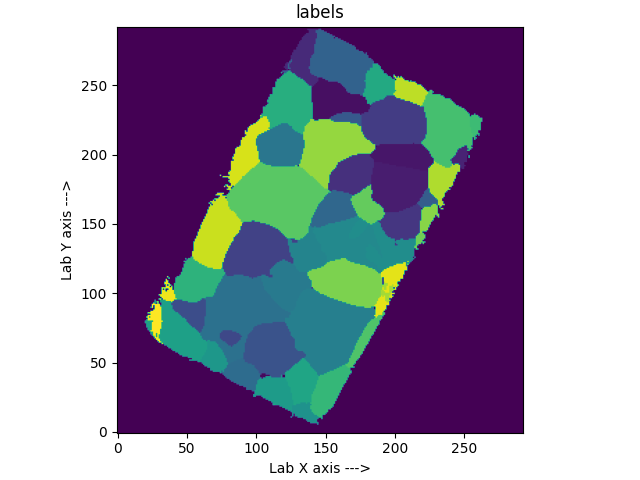

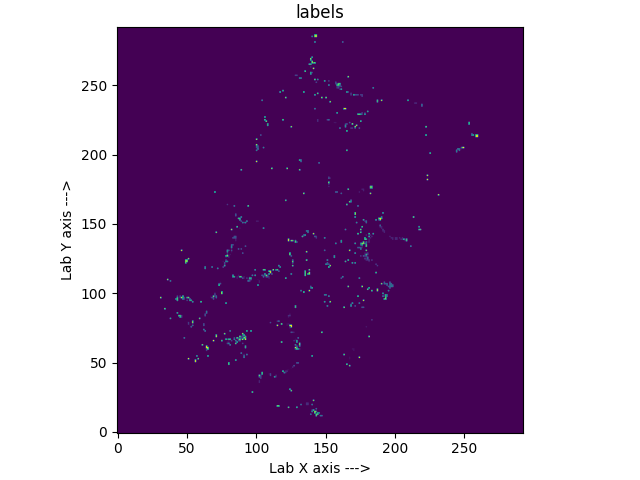

In [9]:
try:
    for tmap in tensor_maps:
        tmap.plot('labels')
except KeyError:
    print('Keyerror')
    # no labels field
    pass

In [10]:
tensor_map_combined = TensorMap.from_combine_phases(tensor_maps)

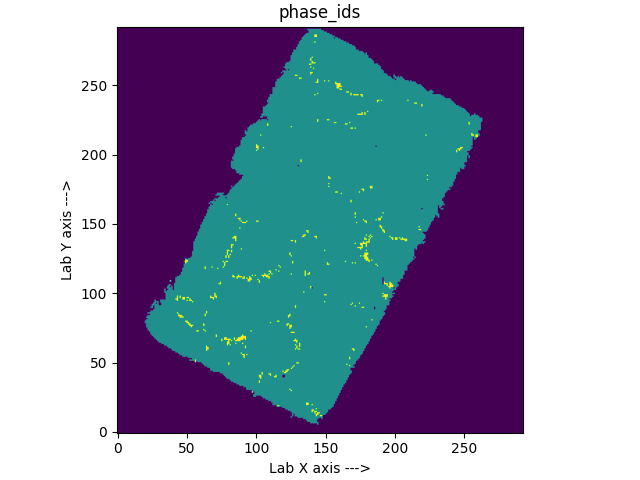

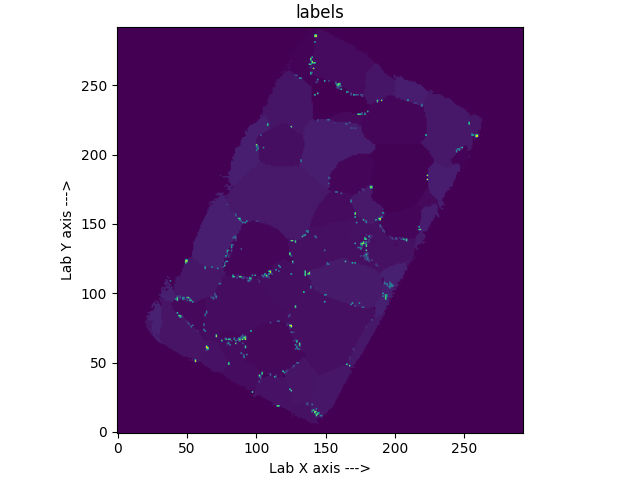

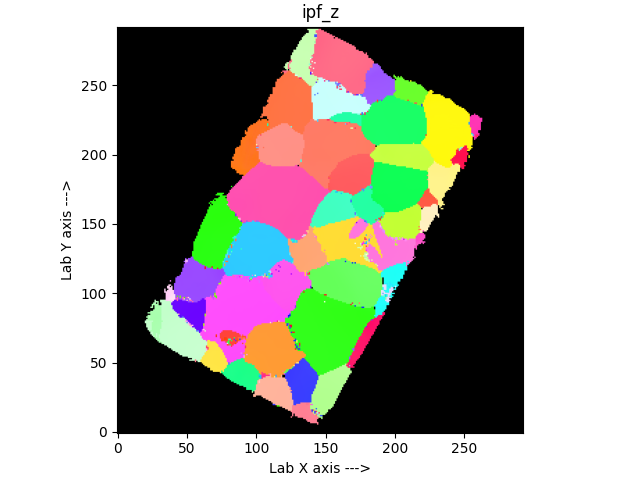

In [11]:
tensor_map_combined.plot('phase_ids')
try:
    tensor_map_combined.plot('labels')
except KeyError:
    # no labels field
    pass
tensor_map_combined.plot('ipf_z')

# Export

Export results

In [12]:
if combine_refined:
    tensor_map_combined.to_h5(os.path.join(ds.analysispath, f'{ds.sample}_{ds.dset}_refined_tmap_combined.h5'))
    tensor_map_combined.to_paraview(os.path.join(ds.analysispath, f'{ds.sample}_{ds.dset}_refined_tmap_combined.h5'))
else:
    tensor_map_combined.to_h5(os.path.join(ds.analysispath, f'{ds.sample}_{ds.dset}_tmap_combined.h5'))
    tensor_map_combined.to_paraview(os.path.join(ds.analysispath, f'{ds.sample}_{ds.dset}_tmap_combined.h5'))

OSError: Unable to create link (name already exists)